# objective

The objective is to analyze the flight
booking dataset obtained from a
platform which is used to book flight
tickets. A thorough study of the data
will aid in the discovery of valuable
insights that will be of enormous
value to passengers. Apply EDA,
statistical methods and Machine
learning algorithms in order to get
meaningful information from it.

# Importing the Libraries


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Dataset Information


Flight booking price prediction dataset contains around 3 lacs records
with 11 attributes .

In [12]:
data=pd.read_csv('Flight_Booking.csv')
data=data.drop(columns=['Unnamed: 0'])
# Count the number of columns using `shape`
num_columns = data.shape[1]

# Print the number of columns
print('Number of columns:', num_columns)
data.head()


Number of columns: 11


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [13]:
data.shape

(300153, 11)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [15]:
data.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


# Missing Values


Checking out the missing values in a dataframe

In [18]:
data.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

# Data Visualization


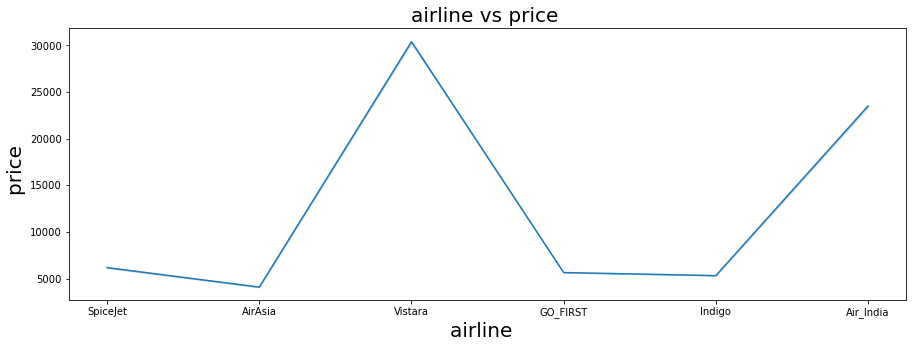

In [25]:
plt.figure(figsize=(15,5))
sns.lineplot(x=data['airline'],y=data['price'])
plt.title('airline vs price ',fontsize=20)
plt.xlabel('airline  ',fontsize=20)
plt.ylabel('price  ',fontsize=20)

plt.show()

There is a variation in price with
different airlines

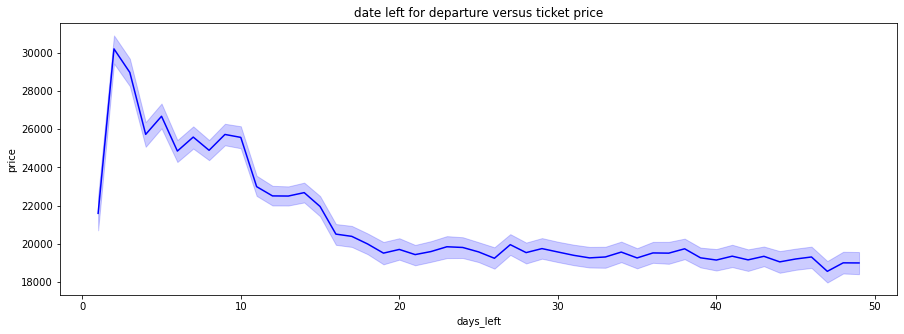

In [28]:
plt.figure(figsize=(15,5))
sns.lineplot(data=data,x='days_left',y='price',color='blue')
plt.title('date left for departure versus ticket price')
plt.show()

The price of the ticket
increases as the days left for
departure decreases 

Price range of all the flights

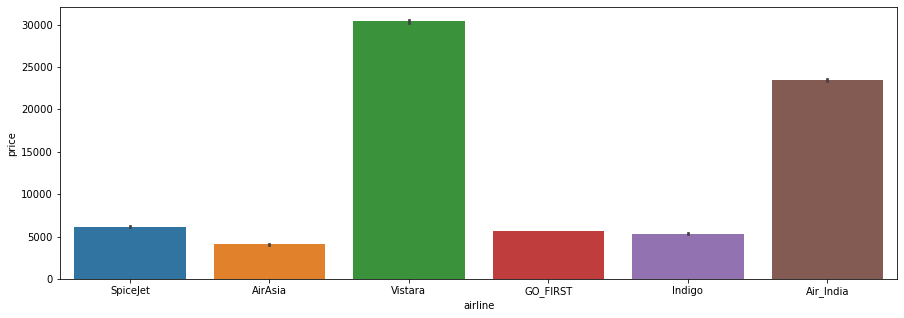

In [31]:
plt.figure(figsize=(15,5))
sns.barplot(x='airline',y='price',data=data)
plt.show()

Range of price of all the
flights of Economy and
Business class

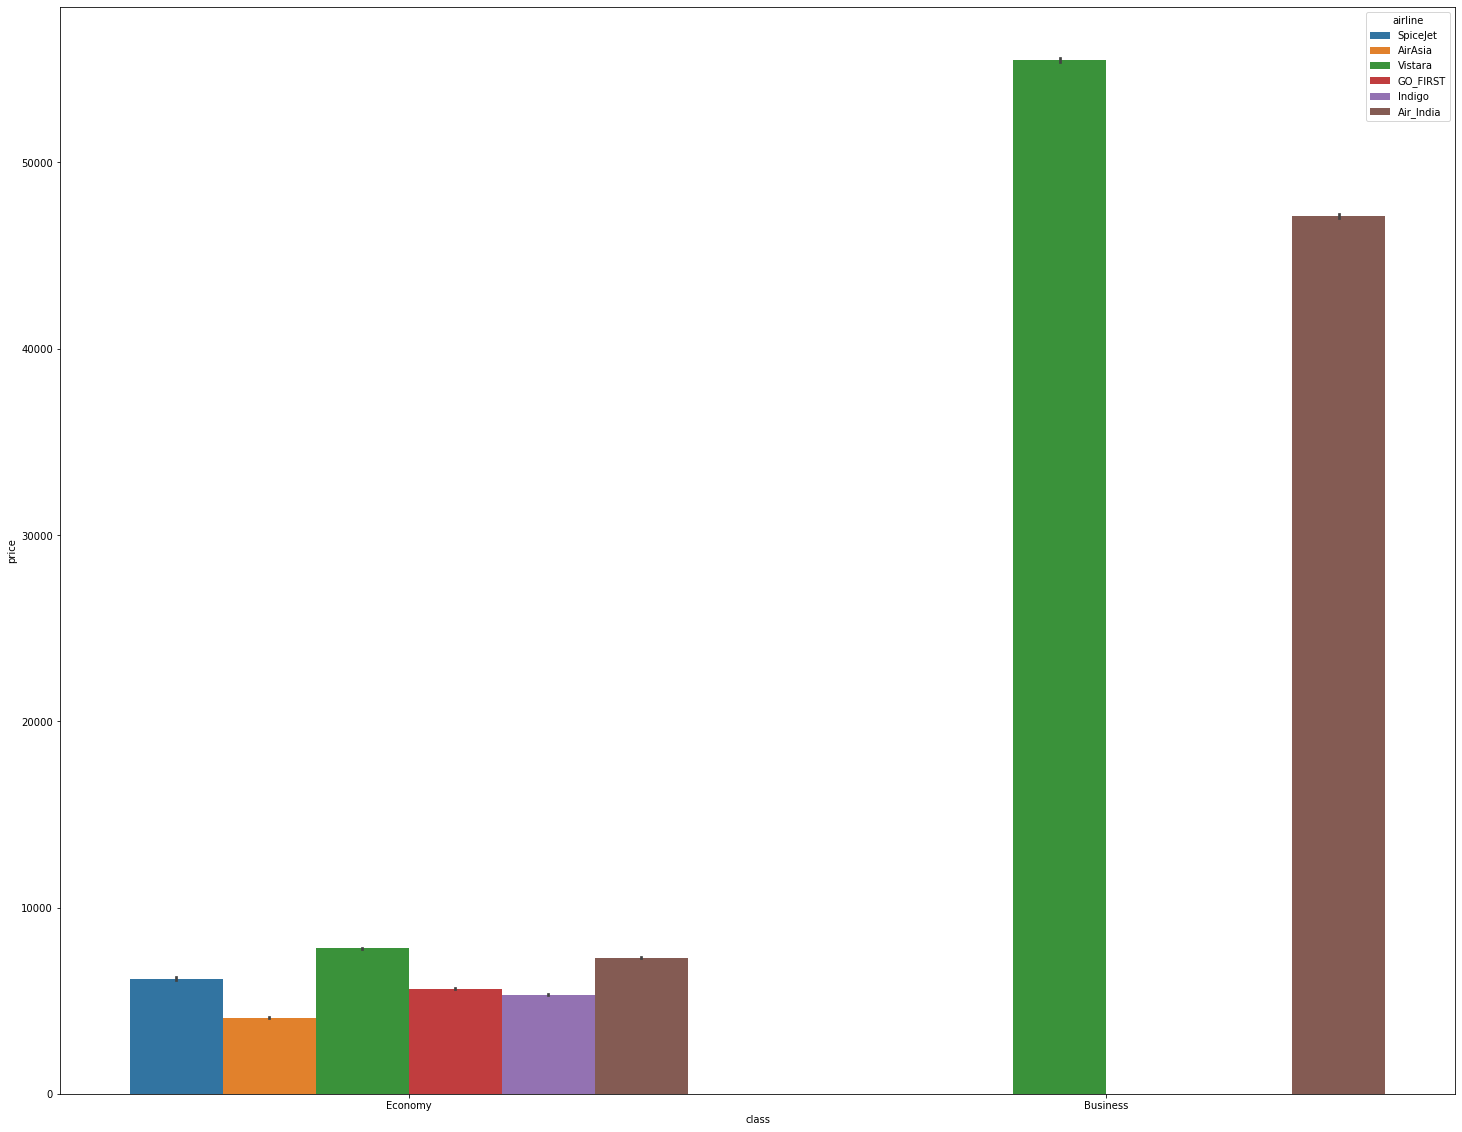

In [38]:
plt.figure(figsize=(25,20))
sns.barplot(x='class',y='price',data=data,hue='airline')
plt.show()

Range of price of flights with source
and destination city according to
the days left

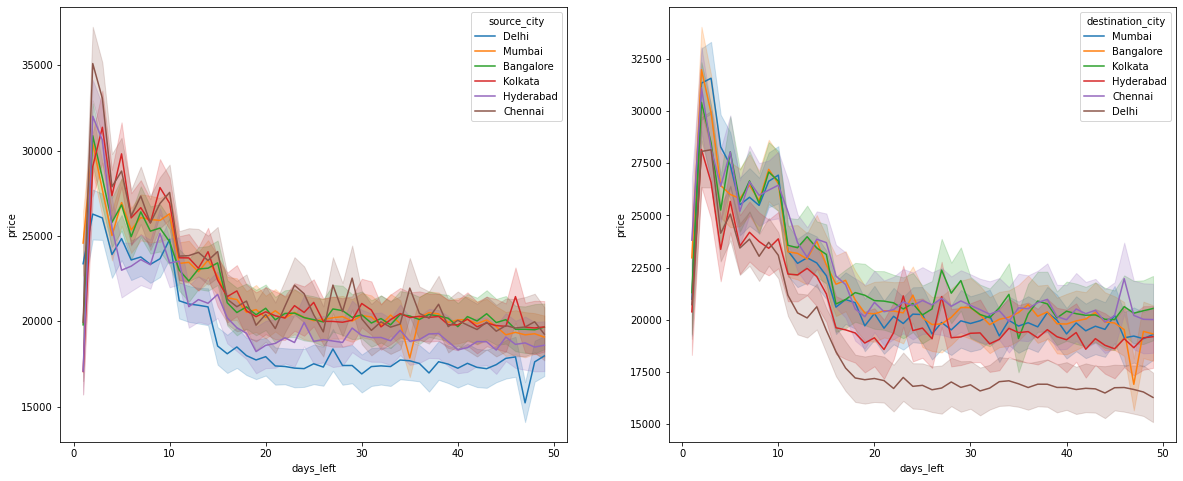

In [49]:
fig,ax=plt.subplots(1,2,figsize=(20,8))
sns.lineplot(x='days_left',y='price',data=data,hue='source_city',ax=ax[0])
sns.lineplot(x='days_left',y='price',data=data,hue='destination_city',ax=ax[1])
plt.show()

Visualization of categorical features with countplot

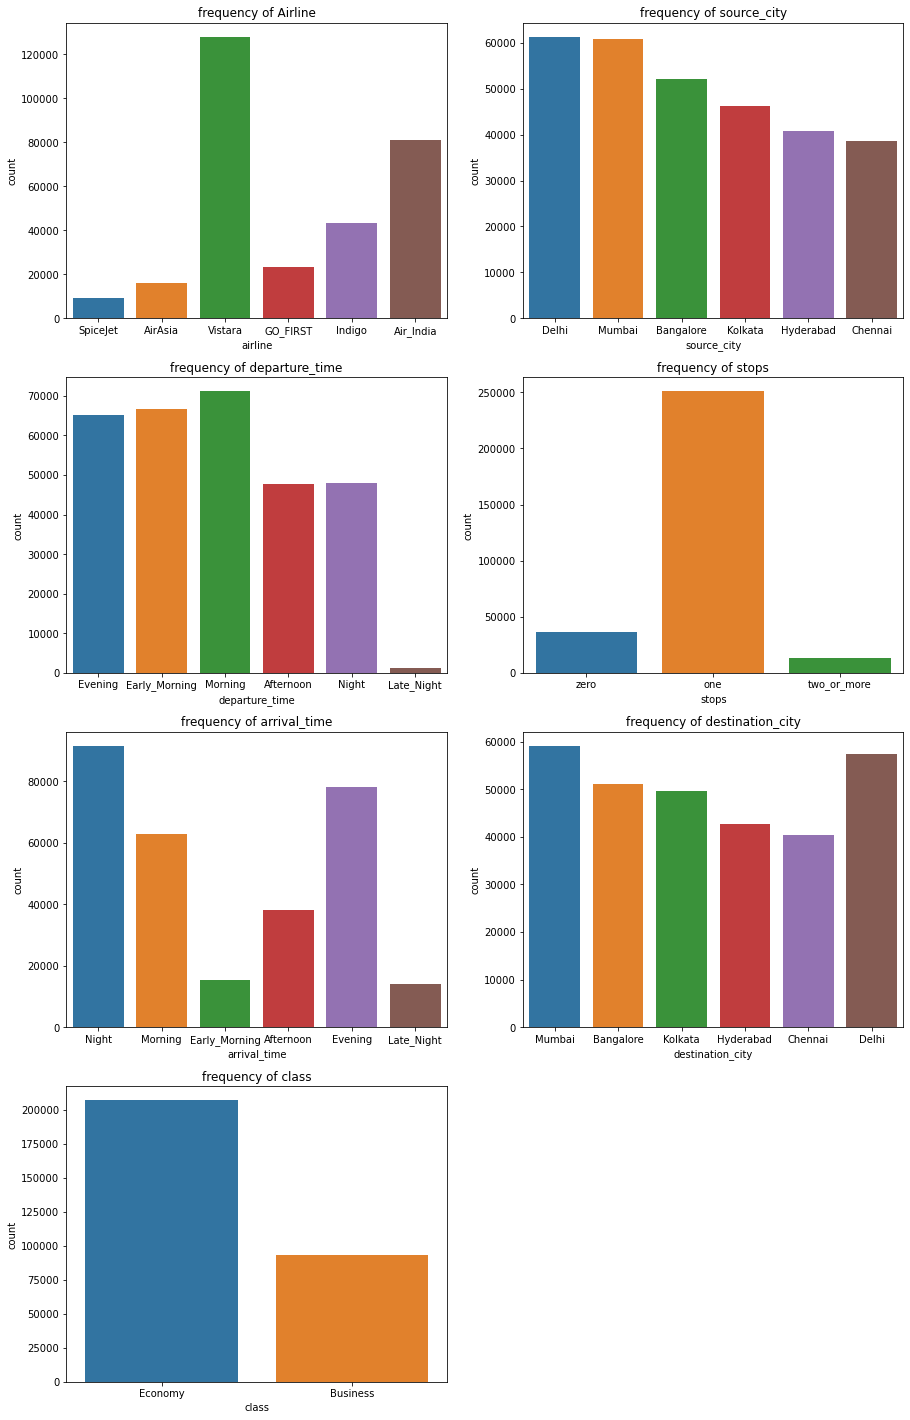

In [64]:
plt.figure(figsize=(15,25))

plt.subplot(4,2,1)
sns.countplot(x=data['airline'])
plt.title('frequency of Airline')

plt.subplot(4,2,2)
sns.countplot(x=data['source_city'])
plt.title('frequency of source_city')

plt.subplot(4,2,3)
sns.countplot(x=data['departure_time'])
plt.title('frequency of departure_time')


plt.subplot(4,2,4)
sns.countplot(x=data['stops'])
plt.title('frequency of stops')

plt.subplot(4,2,5)
sns.countplot(x=data['arrival_time'])
plt.title('frequency of arrival_time')

plt.subplot(4,2,6)
sns.countplot(x=data['destination_city'])
plt.title('frequency of destination_city')

plt.subplot(4,2,7)
sns.countplot(x=data['class'])
plt.title('frequency of class')

plt.show()

# Label Encoding


Performing One Hot Encoding for categorical features of a
dataframe

In [67]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [70]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['airline']=le.fit_transform(data['airline'])
data['source_city']=le.fit_transform(data['source_city'])
data['departure_time']=le.fit_transform(data['departure_time'])
data['stops']=le.fit_transform(data['stops'])
data['arrival_time']=le.fit_transform(data['arrival_time'])
data['destination_city']=le.fit_transform(data['destination_city'])
data['class']=le.fit_transform(data['class'])

data.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int64  
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  int64  
 3   departure_time    300153 non-null  int64  
 4   stops             300153 non-null  int64  
 5   arrival_time      300153 non-null  int64  
 6   destination_city  300153 non-null  int64  
 7   class             300153 non-null  int64  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 25.2+ MB


Feature Selection


Plotting the correlation
graph to see the
correlation between
features and dependent
variable

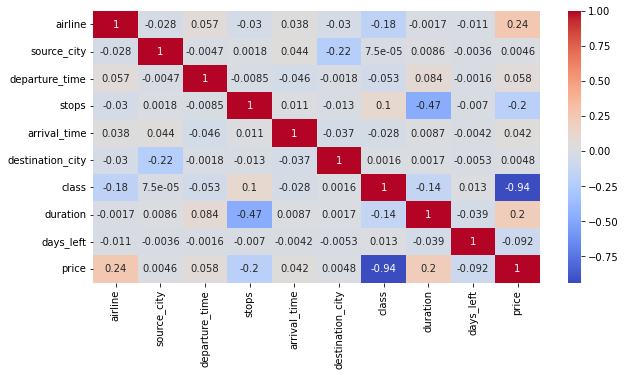

In [71]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True ,cmap='coolwarm')
plt.show()

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'price')):
        col_list.append(col)
        
x= data[col_list]
vif_data =pd.DataFrame()
vif_data['feature'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values,i)
                      for i in range(len(x.columns))]
print(vif_data)

            feature       VIF
0           airline  3.393124
1       source_city  2.927766
2    departure_time  2.779427
3             stops  1.426614
4      arrival_time  3.684550
5  destination_city  2.885337
6             class  2.849370
7          duration  4.113876
8         days_left  3.976790


Selecting the features using
VIF. VIF should be less than 5.
no feature less than 5. so we select all features.

In [82]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,SG-8709,2,2,2,5,5,1,2.17,1,5953
1,4,SG-8157,2,1,2,4,5,1,2.33,1,5953
2,0,I5-764,2,1,2,1,5,1,2.17,1,5956
3,5,UK-995,2,4,2,0,5,1,2.25,1,5955
4,5,UK-963,2,4,2,4,5,1,2.33,1,5955


# Linear Regression


Applying standardization and implementing Linear Regression Model to
predict the price of a flight.

In [83]:
X= data.drop(columns=['price','flight'])
y=data['price']
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# Standardize the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)




In [85]:
# Create the Linear Regression model
lr = LinearRegression()

# Fit the model to the data
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)


In [89]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Calculate the r2 score
r2 = r2_score(y_test, y_pred)

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the mean absolute percentage error
mape = mean_absolute_percentage_error(y_test, y_pred)

# Calculate the root mean squared error
rmse=np.sqrt(mse)

# Print the results
print(f"R2 score: {r2}")
print(f"Mean absolute error: {mae}")
print(f"Mean squared error: {mse}")
print(f"Mean absolute percentage error: {mape}")
print(f"root Mean squared error: {rmse}")


R2 score: 0.9047635108490827
Mean absolute error: 4624.722238536345
Mean squared error: 49105649.450471155
Mean absolute percentage error: 0.4363854632863273
root Mean squared error: 7007.542325984992


Calculating r2 score,MAE, MAPE, MSE, RMSE. Root Mean square error(RMSE)
of the Linear regression model is 7007.54 and Mean absolute percentage
error(MAPE) is 43 percent. Lower the RMSE and MAPE better the model.

Plotting the graph of actual
and predicted price of flight 

C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


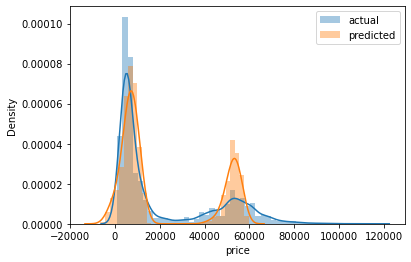

In [95]:
sns.distplot(y_test,label='actual')
plt.legend ()
sns.distplot(y_pred,label='predicted')
plt.legend ()


# Decision Tree Regressor


In [101]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
# Create the Decision Tree Regressor model
regressor = DecisionTreeRegressor()

# Fit the model to the training data
regressor.fit(X_train, y_train)

# Predict the values for the test set
y_pred = regressor.predict(X_test)

# Calculate the evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
np.sqrt(mse)
# Print the evaluation metrics
print('R2 score:', r2)
print('MAE:', mae)
print('MAPE:', mape)
print('MSE:', mse)
print('RMSE:', rmse)

R2 score: 0.9756745591388091
MAE: 1175.502001181608
MAPE: 0.07486779601665085
MSE: 12542635.5203509
RMSE: 7007.542325984992


Mean absolute percentage
error is 7.7 percent and RMSE
is 7007.5 which is less than the
linear regression model

Plotting the graph of actual
and predicted price of flight 

C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


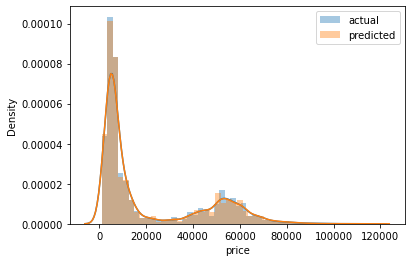

In [102]:
sns.distplot(y_test,label='actual')
plt.legend ()
sns.distplot(y_pred,label='predicted')
plt.legend ()


# Random Forest Regressor


In [105]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error


# Create the Random Forest Regressor model
regressor = RandomForestRegressor()

# Fit the model to the training data
regressor.fit(X_train, y_train)

# Predict the values for the test set
y_pred = regressor.predict(X_test)

# Calculate the evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print('R2 score:', r2)
print('MAE:', mae)
print('MAPE:', mape)
print('MSE:', mse)
print('RMSE:', rmse)

R2 score: 0.9848390648751896
MAE: 1097.312605022637
MAPE: 0.07165276426486898
MSE: 7817251.268056693
RMSE: 2795.93477535809


Mean absolute percentage
error is 7.1 percent and RMSE
is 2795.9 which is less than the
linear regression and decision
tree model

Plotting the graph of actual
and predicted price of flight 

C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


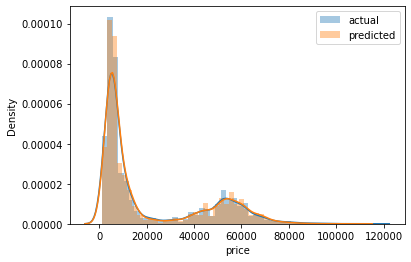

In [107]:
sns.distplot(y_test,label='actual')
plt.legend ()
sns.distplot(y_pred,label='predicted')
plt.legend ()
